# Insights from City Supply and Demand Data

## Objective

+ Find key insights on performance over the last two weeks

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# reading in the dataset and storing it under df
df = pd.read_csv('data/uber_data.csv')

# displaying a random sample of the data
df.sample(n = 5, random_state = 42)

,Date,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers
72,2012-09-13,7,10,1,1,1,4
110,2012-09-14,21,49,6,8,9,17
298,2012-09-22,17,41,2,8,10,20
108,2012-09-14,19,46,6,9,10,15
277,2012-09-21,20,63,8,14,21,28


In [2]:
# looking at and understanding the data types and columns in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336 entries, 0 to 335
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Date             336 non-null    object
 1   Time (Local)     336 non-null    int64 
 2   Eyeballs         336 non-null    int64 
 3   Zeroes           336 non-null    int64 
 4   Completed Trips  336 non-null    int64 
 5   Requests         336 non-null    int64 
 6   Unique Drivers   336 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 18.5+ KB


In [3]:
# getting a high level statistical summary of the numberic columns 
round(df.describe(),2)

,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers
count,336.00,336.0,336.00,336.00,336.00,336.00
mean,11.50,19.9,4.25,4.06,5.53,7.90
std,6.93,16.9,5.80,5.67,7.40,5.88
min,0.00,0.0,0.00,0.00,0.00,0.00
25%,5.75,9.0,1.00,0.00,1.00,3.00
50%,11.50,17.0,3.00,2.00,3.00,8.00
75%,17.25,25.0,5.00,5.00,6.25,11.00
max,23.00,99.0,59.00,36.00,46.00,30.00


In [4]:
# understanding if there are any null values, but also how many
df.isnull().sum()

Date               0
Time (Local)       0
Eyeballs           0
Zeroes             0
Completed Trips    0
Requests           0
Unique Drivers     0
dtype: int64

### Question 1: Which date had the most completed trips during the two week period?

#### Approach

+ Create a table grouped by the date and sum all trips that occurred in that date
+ Sort values by the date ascending
+ Create a visual to digest the information in an easier format

In [5]:
date_totals = df.groupby('Date')['Completed Trips'].sum().reset_index().rename({"Completed Trips" : "Total Trips Completed"}, axis = 1)

date_totals = date_totals.sort_values(by = 'Date', ascending = True)

date_totals

,Date,Total Trips Completed
0,2012-09-10,26
1,2012-09-11,40
2,2012-09-12,91
3,2012-09-13,45
4,2012-09-14,108
5,2012-09-15,199
6,2012-09-16,93
7,2012-09-17,57
8,2012-09-18,42
9,2012-09-19,41


## Creating the visual for the information above

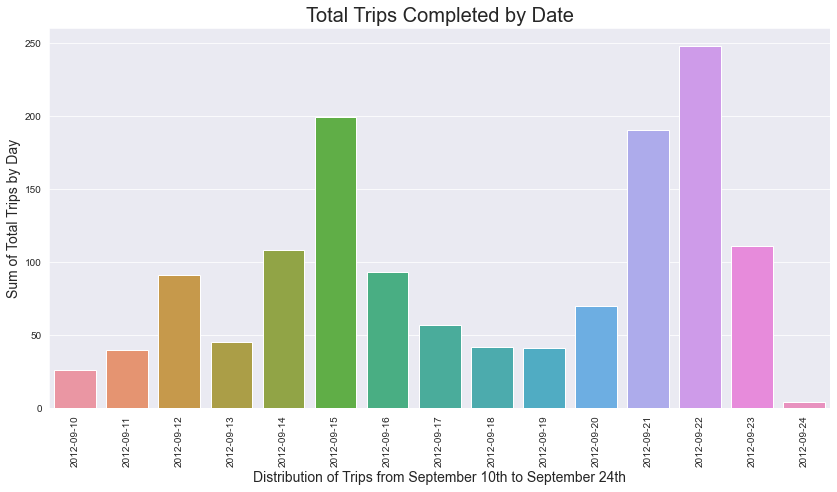

In [6]:
sns.set_style('darkgrid')

fontsize = 20

axfont = 14

fig, ax = plt.subplots(figsize = (14, 7))

sns.barplot(x = 'Date', y = 'Total Trips Completed', data = date_totals, ax = ax)

plt.title('Total Trips Completed by Date', fontdict = {'fontsize'  : fontsize})

plt.ylabel('Sum of Total Trips by Day', fontdict = {'fontsize' : axfont})

plt.xlabel('Distribution of Trips from September 10th to September 24th', fontdict = {'fontsize' : axfont})

plt.xticks(rotation = 90)

plt.show();

In [7]:
date_conversions = df.groupby('Date').agg({"Completed Trips" : "sum", "Requests" : "sum"}).reset_index()

date_conversions['conversion perc'] = round(date_conversions['Completed Trips'] / date_conversions['Requests'] * 100, 1)

date_conversions

,Date,Completed Trips,Requests,conversion perc
0,2012-09-10,26,34,76.5
1,2012-09-11,40,52,76.9
2,2012-09-12,91,114,79.8
3,2012-09-13,45,67,67.2
4,2012-09-14,108,137,78.8
5,2012-09-15,199,282,70.6
6,2012-09-16,93,118,78.8
7,2012-09-17,57,78,73.1
8,2012-09-18,42,81,51.9
9,2012-09-19,41,54,75.9


In [11]:
date_conversions = date_conversions.sort_values(by = 'Date', ascending = True)

date_conversions

,Date,Completed Trips,Requests,conversion perc
0,2012-09-10,26,34,76.5
1,2012-09-11,40,52,76.9
2,2012-09-12,91,114,79.8
3,2012-09-13,45,67,67.2
4,2012-09-14,108,137,78.8
5,2012-09-15,199,282,70.6
6,2012-09-16,93,118,78.8
7,2012-09-17,57,78,73.1
8,2012-09-18,42,81,51.9
9,2012-09-19,41,54,75.9


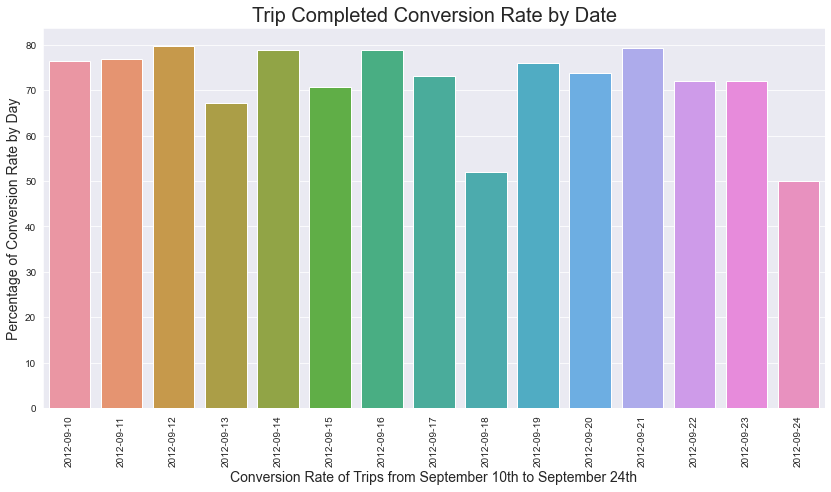

In [12]:
sns.set_style('darkgrid')

fontsize = 20

axfont = 14

fig, ax = plt.subplots(figsize = (14, 7))

sns.barplot(x = 'Date', y = 'conversion perc', data = date_conversions, ax = ax)

plt.title('Trip Completed Conversion Rate by Date', fontdict = {'fontsize'  : fontsize})

plt.ylabel('Percentage of Conversion Rate by Day', fontdict = {'fontsize' : axfont})

plt.xlabel('Conversion Rate of Trips from September 10th to September 24th', fontdict = {'fontsize' : axfont})

plt.xticks(rotation = 90)

plt.show();